In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

<details>
  <summary style="color:blue; font-size:18px;"><b>Question 1: Your views about the problem statement?</b></summary>

  I find the problem statement quite fascinating. It's a unique scenario where a newspaper company, "The Daily Buzz," aims to enhance its services by predicting rainfall through a dedicated column, "The Weather Oracle." As a machine learning expert, the challenge is to create a model that accurately predicts rainfall in Sydney. This task is not only interesting due to its real-world application but also because it requires exploring and comparing various classification models, including ensemble methods like Random Forest and Gradient Boosting. It's an exciting opportunity to contribute to a newspaper's value proposition by integrating machine learning into their services.

</details>



<details>
  <summary style="color:green; font-size:18px;"><b>Question 2: What will be your approach to solving this task?</b></summary>

  My approach to addressing this task involves a systematic workflow encompassing several key steps. First and foremost, I'll conduct thorough data preprocessing, handling missing values, and encoding categorical variables. Following this, I plan to split the dataset into training and testing sets.

  For the model creation, I'll start by applying a Decision Tree Classifier and Random Forest Classifier to establish baseline models. Subsequently, I'll explore ensemble methods like Gradient Boosting, XGBoost, and possibly other classification models such as Logistic Regression and K-Nearest Neighbors.

  To enhance model performance, hyperparameter tuning will be employed, utilizing techniques like GridSearchCV. This involves optimizing the parameters of the selected models to achieve the best possible accuracy. Additionally, I will evaluate model performance using metrics like accuracy, confusion matrix, and classification report.

  The final step involves selecting the most effective model and providing insights into why it outperforms others. Additionally, I'll suggest potential avenues for further improving the selected model's accuracy.

</details>


<details>
  <summary style="color:blue; font-size:18px;"><b>Question 3: What were the available ML model options you had to perform this task?</b></summary>

  In this task, I had a variety of ML model options at my disposal, catering to the classification nature of the problem. The primary models considered include:


- **Random Forest Classifier:** An ensemble method employing multiple decision trees for improved accuracy.
  
- **Gradient Boosting Classifier:** Another ensemble method creating a strong learner by sequentially adding decision trees.
  
- **XGBoost:** An optimized and efficient gradient boosting framework known for its speed and performance.
  
- **Logistic Regression:** A classic linear model suitable for binary classification tasks.
  
- **K-Nearest Neighbors (KNN):** A non-parametric method classifying data based on the majority class of its k-nearest neighbors.
    
- **Decision Tree Classifier:** A fundamental model for binary classification based on recursive splitting of data.

  The diverse set of models allows for a comprehensive exploration of different approaches, enabling the selection of the most suitable model for accurate rainfall prediction.

</details>


<details>
  <summary style="color:orange; font-size:18px;"><b>Question 4: Which model’s performance is best and what could be the possible reason for that? </b></summary>

Based on accuracy scores, Random Forest and Gradient Boosting achieved the highest accuracy at 82.63%. Both models, known for ensemble learning, provide robustness and improved accuracy by combining multiple decision trees. They are suitable for capturing complex relationships in the data and mitigating overfitting.

- **Random Forest and Gradient Boosting:**
  - **Accuracy:** 82.63%
  - Ensemble methods for robust and accurate predictions.
  - Effective in capturing complex patterns in the data.

- **Logistic Regression:**
  - **Accuracy:** 82.19%
  - Classic linear model suitable for linear relationships in data.

- **XGBoost:**
  - **Accuracy:** 81.74%
  - Optimized gradient boosting framework for speed and performance.

- **K-Nearest Neighbors:**
  - **Accuracy:** 77.54%
  - Non-parametric method effective in some scenarios.

- **Decision Tree:**
  - **Accuracy:** 76.05%
  - Fundamental model with limitations in generalization.

**Conclusion:**
- Random Forest and Gradient Boosting are recommended for their high accuracy and robustness in capturing data patterns.
- The final choice may consider factors like interpretability and computational resources.


<details>
  <summary style="color:purple; font-size:18px;"><b>Question 5: What steps can you take to improve this selected model’s performance even further? 
 </b></summary>

**Improving Model Performance:**

1. **Hyperparameter Tuning:**
   - Fine-tune model settings (hyperparameters) for better results.

2. **Feature Tweaks:**
   - Experiment with feature modifications and scaling.

3. **Class Imbalance:**
   - Address imbalances using oversampling or undersampling.

4. **Ensemble Trials:**
   - Try ensemble methods for combined model predictions.

5. **Cross-Validation Check:**
   - Implement robust cross-validation techniques.

6. **Interpretability:**
   - Explore SHAP values for better model understanding.

7. **More Data, Please:**
   - If possible, gather additional data for improved learning.

8. **Error Insight:**
   - Analyze model errors to identify improvement areas.

9. **Regularization Magic:**
   - Apply regularization to prevent overfitting.

10. **Model Makeover:**
    - Experiment with different algorithms or architectures.

These steps, while basic, offer a starting point for enhancing the model's performance. Keep iterating and experimenting!


# Step 1: Data Preprocessing

In [84]:
# Load the data
file_path = "C:/Users/rhood/OneDrive/Desktop/ML/syrain.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-02-2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  02-02-2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  03-02-2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  04-02-2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  05-02-2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [86]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handle missing values for categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check for missing values after handling
df.isnull().sum()


Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [87]:
# Convert 'Date' column to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

# Handle missing values
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handle missing values for categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Convert categorical columns to numerical
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Check for missing values after handling
df.isnull().sum()


Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


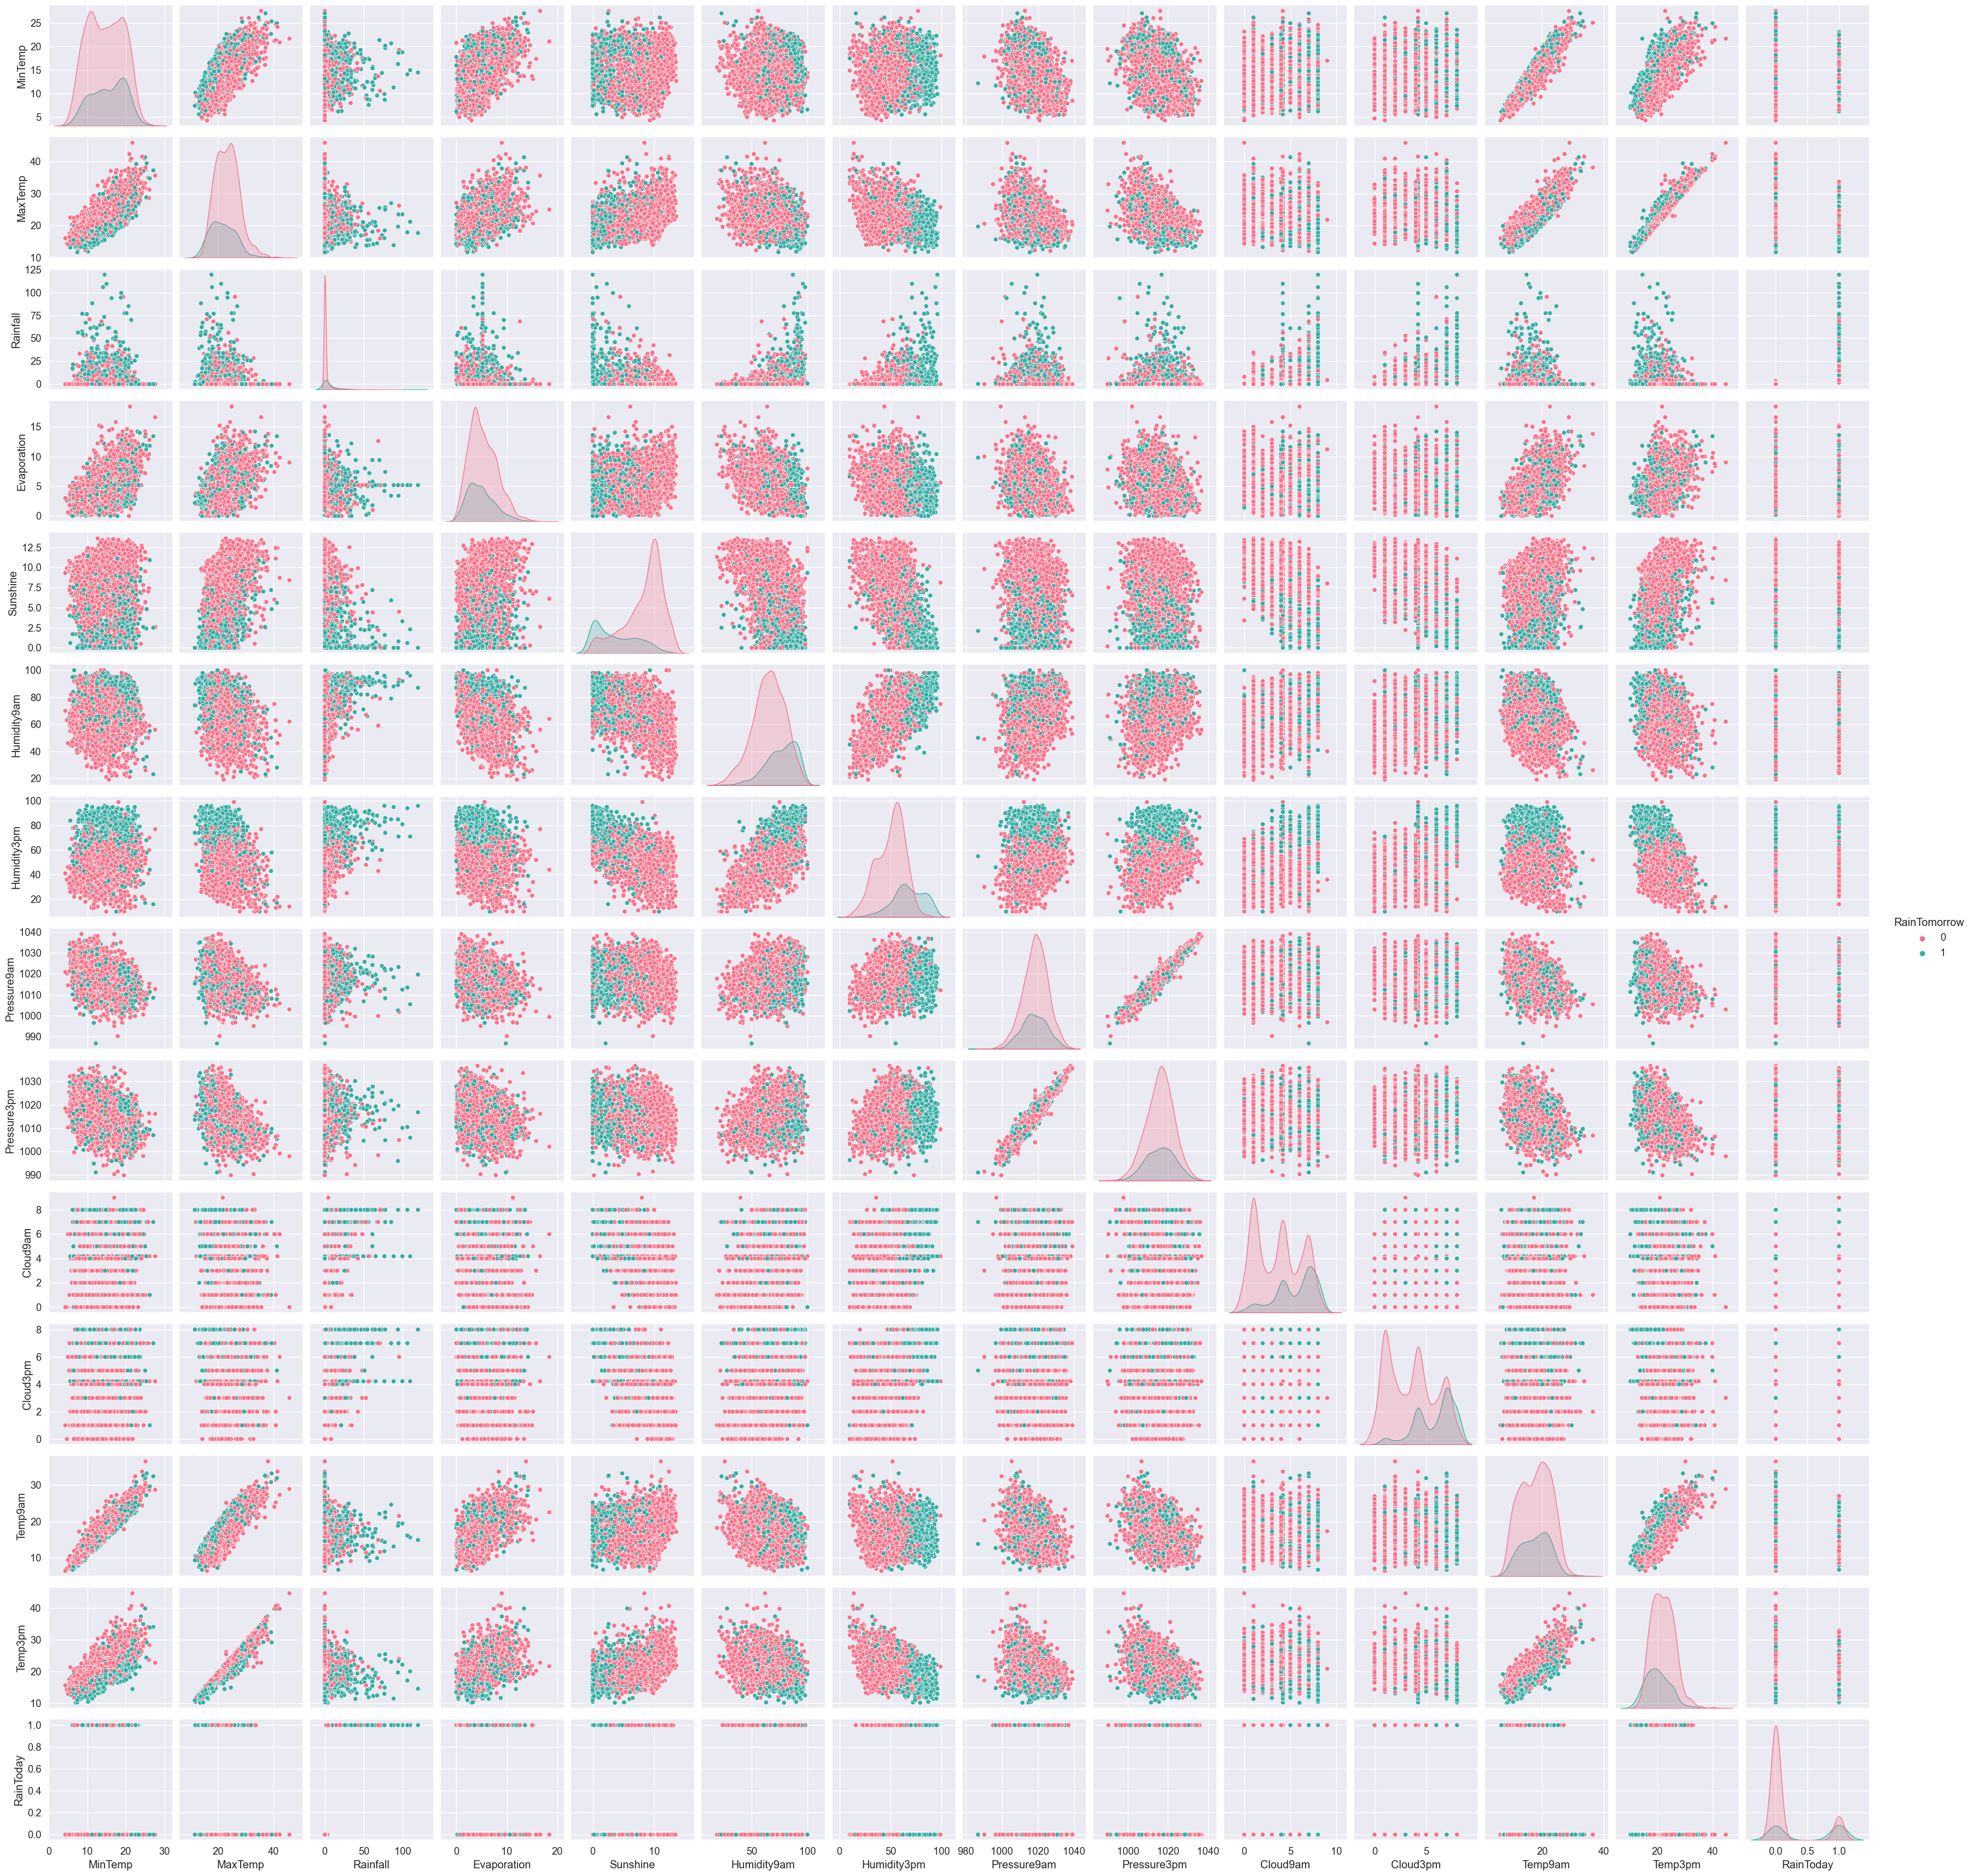

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'RainTomorrow' is the target variable
sns.pairplot(df, hue='RainTomorrow', palette='husl')  # Using 'husl' palette for more color
plt.show()


# Step 2: Rainfall Prediction with Random Forest Classifier & hyperparameter tuning using GridSearchCV

In [91]:
# Assuming 'RainTomorrow' is the target variable
X = pd.get_dummies(df.drop(['RainTomorrow', 'Date'], axis=1), drop_first=True)  # Exclude 'Date' from features
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print or visualize the initial evaluation results
print(f"Initial Model Accuracy: {accuracy}")
print(f"Initial Model Confusion Matrix:\n{conf_matrix}")
print(f"Initial Model Classification Report:\n{classification_rep}")

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importance:")
print(feature_importances)

# Example hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

Initial Model Accuracy: 0.8263473053892215
Initial Model Confusion Matrix:
[[448  36]
 [ 80 104]]
Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       484
           1       0.74      0.57      0.64       184

    accuracy                           0.83       668
   macro avg       0.80      0.75      0.76       668
weighted avg       0.82      0.83      0.82       668


Feature Importance:
             Importance
Humidity3pm    0.172654
Sunshine       0.149483
Humidity9am    0.073250
Rainfall       0.068375
Temp3pm        0.066155
Cloud3pm       0.062906
MaxTemp        0.061279
Pressure3pm    0.059916
Pressure9am    0.056142
Evaporation    0.055869
MinTemp        0.055782
Temp9am        0.054697
Cloud9am       0.040452
RainToday      0.023039


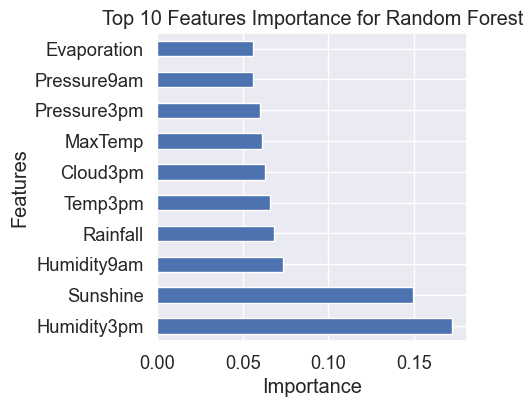

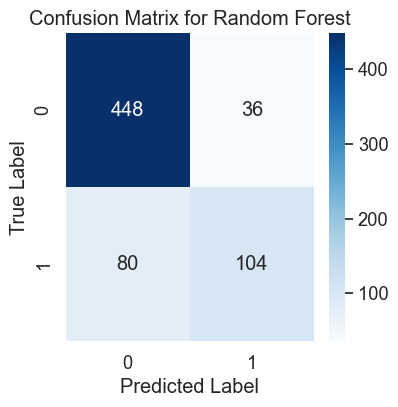

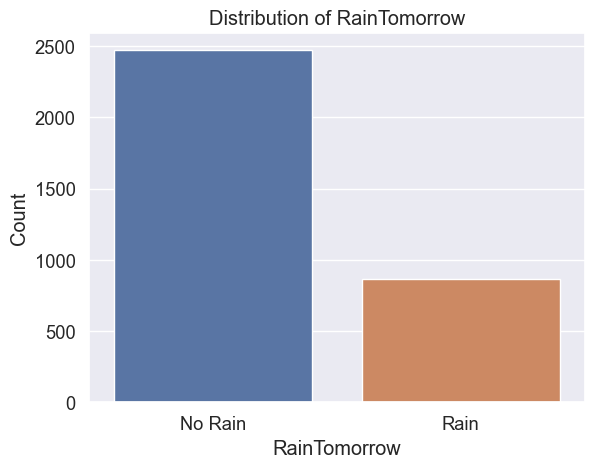

In [104]:
# Feature Importance Plot
plt.figure(figsize=(4, 4))
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh', title='Top 10 Features Importance')
plt.title('Top 10 Features Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Assuming 'RainTomorrow' is the target variable
target_counts = df['RainTomorrow'].value_counts()

# Mapping labels for better interpretation
target_labels = {0: 'No Rain', 1: 'Rain'}

# Plot the counts with updated labels
sns.barplot(x=target_counts.index.map(target_labels), y=target_counts.values)
plt.title('Distribution of RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()


###  Top 10 Features Importance Bar Plot:

- This plot displays the importance of the top 10 features in the Random Forest model.
- The importance is calculated based on how much each feature contributes to the model's decision-making process.
- Features with higher importance are shown at the top of the bar plot.

### Confusion Matrix Heatmap:

- The confusion matrix summarizes the performance of the model by comparing predicted and actual classifications.
- Each cell in the matrix represents the count of instances for a specific combination of predicted and true classes.
- The heatmap provides a visual representation, where darker colors indicate higher counts.

- Dark blue in the bottom-right: Correctly predicted "Rain."
- Dark blue in the top-left: Correctly predicted "No Rain."
- Light blue in the top-right: Incorrectly predicted "Rain" when it was "No Rain."
- Light blue in the bottom-left: Incorrectly predicted "No Rain" when it was "Rain."
- This heatmap helps assess how well the model is performing in predicting rainy and non-rainy days.

Each visualization provides valuable insights into the Random Forest model's behavior and effectiveness. The feature importance plot helps identify influential features, the confusion matrix evaluates classification accuracy.

# Step 3: Gradient Boosting

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [106]:
# Assuming 'RainTomorrow' is the target variable
X = pd.get_dummies(df.drop(['RainTomorrow', 'Date'], axis=1), drop_first=True)
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print or visualize the evaluation results
    print(f"{model_name} Model Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")

    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['Importance'])
        feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
        print("\nFeature Importance:")
        print(feature_importances)


In [107]:
rf_model = RandomForestClassifier(random_state=42)
train_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")


Random Forest Model Accuracy: 0.8263473053892215
Confusion Matrix:
[[448  36]
 [ 80 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       484
           1       0.74      0.57      0.64       184

    accuracy                           0.83       668
   macro avg       0.80      0.75      0.76       668
weighted avg       0.82      0.83      0.82       668


Feature Importance:
             Importance
Humidity3pm    0.172654
Sunshine       0.149483
Humidity9am    0.073250
Rainfall       0.068375
Temp3pm        0.066155
Cloud3pm       0.062906
MaxTemp        0.061279
Pressure3pm    0.059916
Pressure9am    0.056142
Evaporation    0.055869
MinTemp        0.055782
Temp9am        0.054697
Cloud9am       0.040452
RainToday      0.023039


In [108]:
gb_model = GradientBoostingClassifier(random_state=42)
train_evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting")

# Hyperparameter tuning for Gradient Boosting

Gradient Boosting Model Accuracy: 0.8218562874251497
Confusion Matrix:
[[448  36]
 [ 83 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.74      0.55      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.76       668
weighted avg       0.81      0.82      0.81       668


Feature Importance:
             Importance
Humidity3pm    0.390744
Sunshine       0.314994
Rainfall       0.075290
Temp3pm        0.032496
Evaporation    0.027872
Pressure9am    0.025727
Humidity9am    0.025362
MaxTemp        0.024827
MinTemp        0.022393
Pressure3pm    0.019186
Cloud3pm       0.018493
Temp9am        0.015237
Cloud9am       0.007353
RainToday      0.000025


In [110]:
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
}


In [111]:
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Get the best parameters for Gradient Boosting
best_params_gb = grid_search_gb.best_params_

# Initialize the Gradient Boosting Classifier with best parameters
gb_model_best = GradientBoostingClassifier(**best_params_gb)

# Train and evaluate the model with the best parameters for Gradient Boosting
train_evaluate_model(gb_model_best, X_train, y_train, X_test, y_test, "Gradient Boosting (Tuned)")

Gradient Boosting (Tuned) Model Accuracy: 0.8263473053892215
Confusion Matrix:
[[458  26]
 [ 90  94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       484
           1       0.78      0.51      0.62       184

    accuracy                           0.83       668
   macro avg       0.81      0.73      0.75       668
weighted avg       0.82      0.83      0.81       668


Feature Importance:
             Importance
Humidity3pm    0.446728
Sunshine       0.301383
Rainfall       0.070990
Humidity9am    0.029094
Temp3pm        0.027803
Evaporation    0.023815
MaxTemp        0.023363
Pressure3pm    0.018981
Pressure9am    0.016107
Cloud3pm       0.014430
MinTemp        0.011194
Temp9am        0.009824
Cloud9am       0.006276
RainToday      0.000012


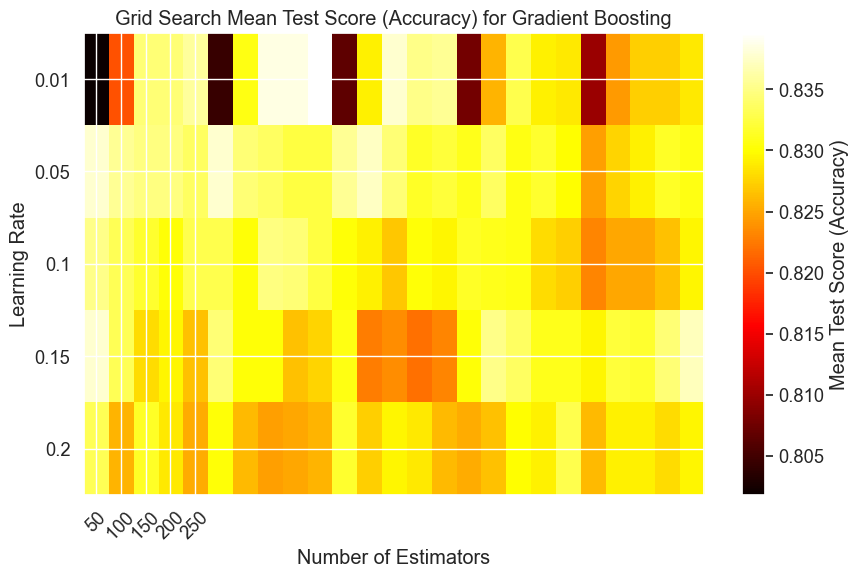

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Extract results from the grid search
results_gb = grid_search_gb.cv_results_
learning_rates = param_grid_gb['learning_rate']
n_estimators = param_grid_gb['n_estimators']

# Reshape the results to create a 2D array
accuracy_scores = np.array(results_gb['mean_test_score']).reshape(len(learning_rates), -1)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(accuracy_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto')
plt.colorbar(label='Mean Test Score (Accuracy)')
plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
plt.yticks(np.arange(len(learning_rates)), learning_rates)
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.title('Grid Search Mean Test Score (Accuracy) for Gradient Boosting')
plt.show()


**X-axis (Number of Estimators):**

- Each column on the heatmap represents a different number of estimators (trees) used in the Gradient Boosting model.
- The values on the X-axis correspond to the number of trees in the ensemble.

**Y-axis (Learning Rate):**

- Each row on the heatmap represents a different learning rate used in the Gradient Boosting model.
- The values on the Y-axis correspond to the learning rates.

**Color of Cells:**

- The color of each cell in the heatmap represents the mean test score (accuracy) achieved by the model with a specific combination of learning rate and number of estimators.
- Darker colors (hotter colors like red) indicate higher mean test scores, implying better model performance.

**Color Bar (on the right side of the heatmap):**

- The color bar provides a reference for the mapping of colors to mean test scores.
- The label on the color bar indicates the meaning of the colors, with lighter colors corresponding to lower accuracy and darker colors corresponding to higher accuracy.

**Title and Axes Labels:**

- The title of the heatmap indicates that it represents the grid search mean test score (accuracy) for the Gradient Boosting model.
- The X-axis label specifies the parameter being varied (Number of Estimators).
- The Y-axis label specifies the parameter being varied (Learning Rate).

Overall, the heatmap provides a visual summary of how the model's accuracy changes with different combinations of learning rates and numbers of estimators. It helps identify regions of hyperparameter values that result in better model performance, guiding the selection of optimal hyperparameters for the Gradient Boosting model.


# Step:4 Logistical rgression

In [39]:
from sklearn.linear_model import LogisticRegression

# Assuming 'RainTomorrow' is the target variable
X = pd.get_dummies(df.drop(['RainTomorrow', 'Date'], axis=1), drop_first=True)
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

# Print or visualize the evaluation results for Logistic Regression
print(f"Logistic Regression Model Accuracy: {accuracy_logreg}")
print(f"Logistic Regression Model Confusion Matrix:\n{conf_matrix_logreg}")
print(f"Logistic Regression Model Classification Report:\n{classification_rep_logreg}")


Logistic Regression Model Accuracy: 0.8218562874251497
Logistic Regression Model Confusion Matrix:
[[446  38]
 [ 81 103]]
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       484
           1       0.73      0.56      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.76       668
weighted avg       0.81      0.82      0.81       668



C:\Users\rhood\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


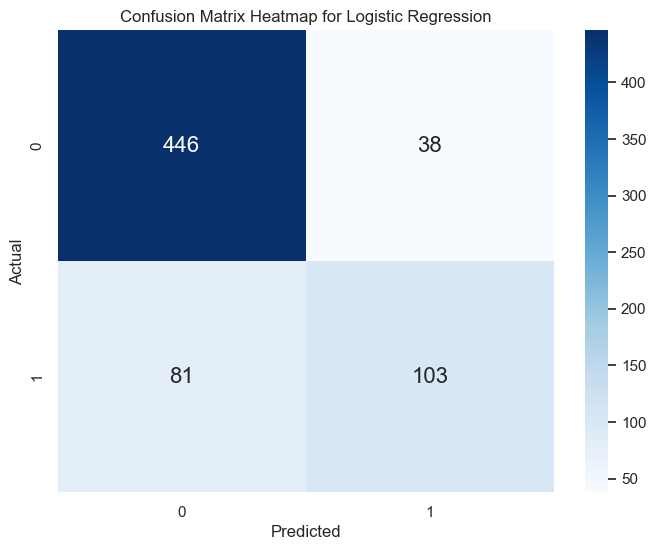

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot the Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Logistic Regression')
plt.show()



Imagine you have two buckets, one for "No Rain Tomorrow" and another for "Rain Tomorrow." Now, the logistic regression model is trying to predict whether it will rain or not based on the given features.

1. **True Positives (TP):**
   - Meaning: The model correctly predicted "Rain Tomorrow" when it actually rained.
   - Visualization: Picture all the times it said "Rain Tomorrow," and indeed, it did rain.
   - **Result:** 103 instances

2. **True Negatives (TN):**
   - Meaning: The model correctly predicted "No Rain Tomorrow" when it didn't rain.
   - Visualization: Picture all the times it said "No Rain Tomorrow," and sure enough, it didn't rain.
   - **Result:** 446 instances

3. **False Positives (FP):**
   - Meaning: The model predicted "Rain Tomorrow," but it didn't actually rain.
   - Visualization: Picture all the times it said "Rain Tomorrow," but, oops, it didn't rain.
   - **Result:** 38 instances

4. **False Negatives (FN):**
   - Meaning: The model predicted "No Rain Tomorrow," but it actually rained.
   - Visualization: Picture all the times it said "No Rain Tomorrow," but, surprise, it rained.
   - **Result:** 81 instances

Now, in our heatmap:

- Darker Blue squares: Many instances where the model got it right.
- Lighter Blue squares: Instances where the model got it wrong.


# Step:5 KNN MODEL

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'RainTomorrow' is the target variable
X = pd.get_dummies(df.drop(['RainTomorrow', 'Date'], axis=1), drop_first=True)
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print or visualize the evaluation results for KNN
print(f"K-Nearest Neighbors Model Accuracy: {accuracy_knn}")
print(f"K-Nearest Neighbors Model Confusion Matrix:\n{conf_matrix_knn}")
print(f"K-Nearest Neighbors Model Classification Report:\n{classification_rep_knn}")


K-Nearest Neighbors Model Accuracy: 0.7754491017964071
K-Nearest Neighbors Model Confusion Matrix:
[[424  60]
 [ 90  94]]
K-Nearest Neighbors Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       484
           1       0.61      0.51      0.56       184

    accuracy                           0.78       668
   macro avg       0.72      0.69      0.70       668
weighted avg       0.77      0.78      0.77       668



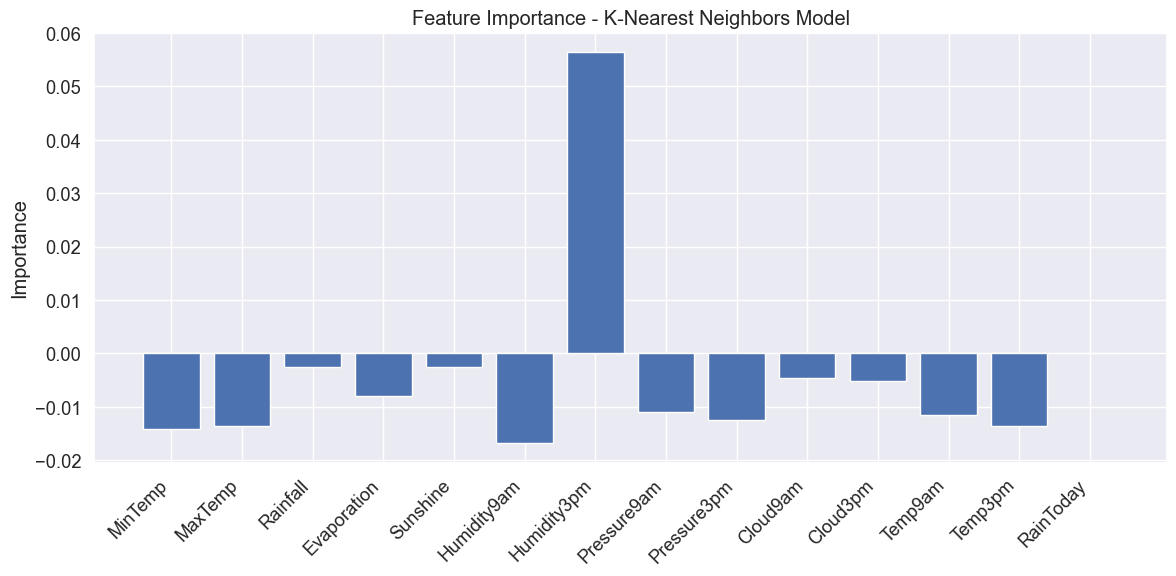

In [114]:
from sklearn.inspection import permutation_importance

# Assuming 'RainTomorrow' is the target variable
X = pd.get_dummies(df.drop(['RainTomorrow', 'Date'], axis=1), drop_first=True)
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Perform permutation importance analysis
perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=30, random_state=42)

# Extract feature importances
feature_importances = perm_importance.importances_mean

# Create a bar chart for feature importance
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(X.columns, feature_importances)
ax.set_ylabel('Importance')
ax.set_title('Feature Importance - K-Nearest Neighbors Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


### K-Nearest Neighbors Model Feature Importance

- **X-axis (Features):**
  - Each bar corresponds to a feature in the KNN model.
  - Features are listed on the X-axis.

- **Y-axis (Importance):**
  - Bar height represents the importance of each feature.
  - Taller bars indicate more importance.

- **Key Points:**
  - Longer bars imply greater feature importance.
  - Helps identify influential features in the KNN model.

- **Conclusion:**
  - Quick overview of feature importance in the KNN model.
  - Aids in understanding which features impact the model's predictions.


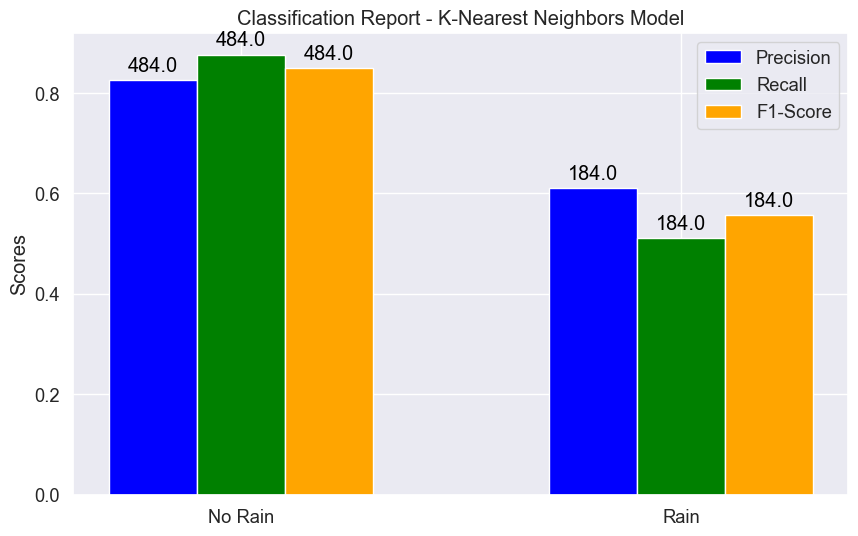

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Classification Report
classification_rep_knn = classification_report(y_test, y_pred_knn, target_names=['No Rain', 'Rain'], output_dict=True)

# Extracting precision, recall, f1-score, and support for each class
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [[classification_rep_knn[label][metric.lower()] for metric in metrics] for label in ['No Rain', 'Rain']]
support = [classification_rep_knn[label]['support'] for label in ['No Rain', 'Rain']]

# Clustered Column Chart
labels = ['No Rain', 'Rain']
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(labels))

# Set colors for each metric
colors = ['blue', 'green', 'orange']

for i, metric in enumerate(metrics):
    ax.bar(x + width * i, [score[i] for score in scores], width, label=metric, color=colors[i])

# Annotate counts on top of bars
for i, label in enumerate(labels):
    for j, metric in enumerate(metrics):
        count = support[i]
        height = scores[i][j]
        ax.text(x[i] + width * j, height + 0.01, f'{count}', ha='center', va='bottom', color='black')

ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.set_ylabel('Scores')
ax.set_title('Classification Report - K-Nearest Neighbors Model')
ax.legend()

plt.show()


## K-Nearest Neighbors Model Performance Metrics

### Chart Overview

- **Representation:** The chart uses clustered columns to display performance metrics, including Precision, Recall, and F1-Score, for both "No Rain" and "Rain" classes.
- **Color Code:** Each metric is color-coded for easy identification. Blue represents Precision, green represents Recall, and orange represents F1-Score.
- **Count Display:** The chart provides additional information by displaying the count (support) on top of each bar, giving insights into the number of instances in each class.

### Metric Explanation

- **Precision:** This metric assesses the accuracy of positive predictions. It answers the question: "Of all instances predicted as positive, how many were actually positive?" High precision indicates fewer false positives.

- **Recall (Sensitivity):** Recall measures the model's ability to capture all actual positive instances. It answers the question: "Of all actual positive instances, how many did the model correctly identify as positive?" High recall indicates fewer false negatives.

- **F1-Score:** F1-Score is the harmonic mean of Precision and Recall. It provides a balanced metric that considers both false positives and false negatives. It is particularly useful in scenarios with imbalanced class distribution.

### Summary

The chart effectively communicates the performance metrics of the K-Nearest Neighbors model. The color-coded columns and count annotations enhance interpretability, providing a comprehensive view of positive prediction accuracy, the model's ability to capture actual positives, and the overall balance between precision and recall.


#### K-Nearest Neighbors (KNN) model. Feature importance helps us understand which features have a stronger impact on the model's predictions.

In [79]:
pip install scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Step:6 XGBOOST MODEL

In [115]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'RainTomorrow' is the target variable
X = pd.get_dummies(df.drop(['RainTomorrow', 'Date'], axis=1), drop_first=True)
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print or visualize the evaluation results for XGBoost
print(f"XGBoost Model Accuracy: {accuracy_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")
print(f"Classification Report:\n{classification_rep_xgb}")

# Get feature importances for XGBoost
feature_importances_xgb = pd.DataFrame(xgb_model.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importances_xgb.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importance:")
print(feature_importances_xgb)


XGBoost Model Accuracy: 0.8173652694610778
Confusion Matrix:
[[437  47]
 [ 75 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       484
           1       0.70      0.59      0.64       184

    accuracy                           0.82       668
   macro avg       0.78      0.75      0.76       668
weighted avg       0.81      0.82      0.81       668


Feature Importance:
             Importance
Humidity3pm    0.198498
Sunshine       0.193454
Rainfall       0.088978
Pressure9am    0.057690
MaxTemp        0.056067
Temp3pm        0.055829
Humidity9am    0.055726
Temp9am        0.051205
Cloud3pm       0.050640
MinTemp        0.050333
Evaporation    0.048938
Pressure3pm    0.048706
Cloud9am       0.043935
RainToday      0.000000


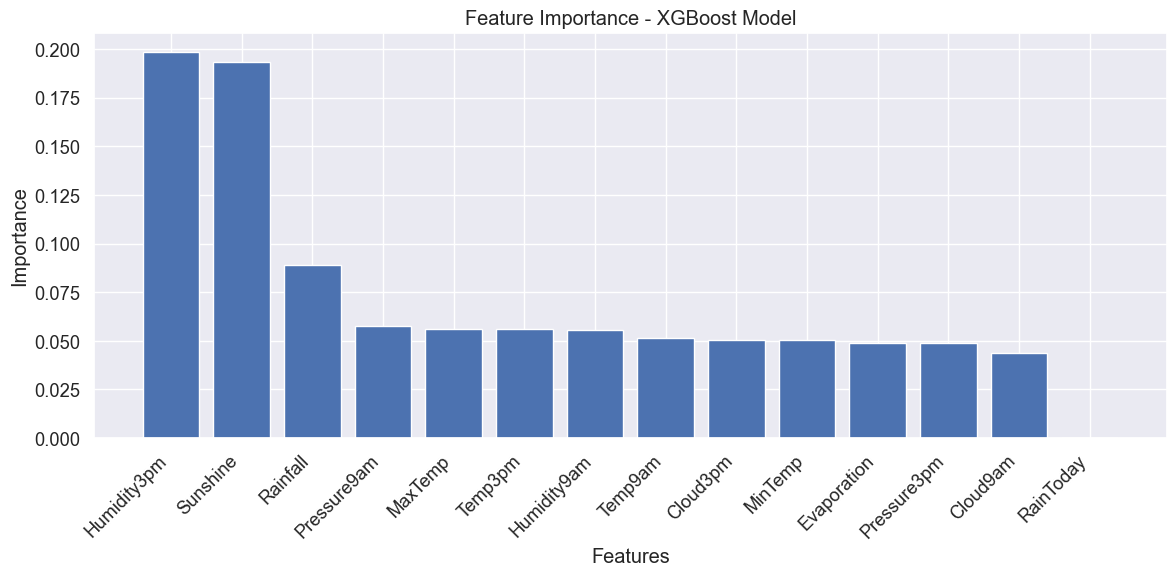

In [116]:
# Plot Feature Importance for XGBoost
plt.figure(figsize=(12, 6))
plt.bar(feature_importances_xgb.index, feature_importances_xgb['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Feature Importance - XGBoost Model

- **X-axis (Features):**
  - Each bar corresponds to a specific feature in the dataset.

- **Y-axis (Importance):**
  - The height of each bar represents the importance of the corresponding feature.

- **Color and Style:**
  - Simple color and style for clarity.

- **Title:**
  - Indicates it represents feature importance from the XGBoost model.

- **Interpretation:**
  - Taller bars indicate more influential features for predictions.

This visualization offers a quick overview of the most important features considered by the XGBoost model, aiding in understanding key factors in rainfall prediction. Adjustments can be made to enhance clarity based on preferences.


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'RainTomorrow' is the target variable
X = pd.get_dummies(df.drop(['RainTomorrow', 'Date'], axis=1), drop_first=True)
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print or visualize the evaluation results
print(f"Decision Tree Model Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Get feature importances
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importance:")
print(feature_importances)


Decision Tree Model Accuracy: 0.7604790419161677
Confusion Matrix:
[[402  82]
 [ 78 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       484
           1       0.56      0.58      0.57       184

    accuracy                           0.76       668
   macro avg       0.70      0.70      0.70       668
weighted avg       0.76      0.76      0.76       668


Feature Importance:
             Importance
Humidity3pm    0.316242
Sunshine       0.139742
Humidity9am    0.066294
Rainfall       0.058005
Pressure9am    0.057875
Evaporation    0.057510
Temp9am        0.054794
MaxTemp        0.054356
MinTemp        0.049867
Pressure3pm    0.045443
Temp3pm        0.044122
Cloud3pm       0.030763
Cloud9am       0.022031
RainToday      0.002957


<Figure size 1000x600 with 0 Axes>

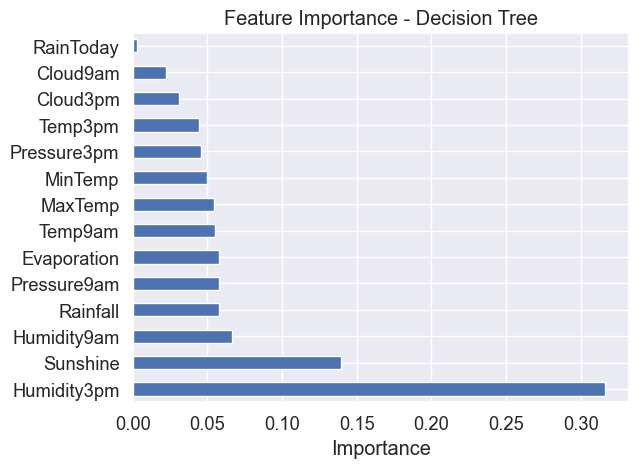

In [122]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot Feature Importance for Decision Tree
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', legend=False)
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()


## Feature Importance - Decision Tree Model

The bar chart above illustrates the feature importances obtained from the Decision Tree model. Key points:

- **X-axis:** Importance values for each feature.
- **Y-axis:** Features used in the model.
- **Interpretation:** Higher bars indicate more influential features in the decision-making process.
  
### Insights:

- **Top Features:**
  - `Humidity3pm` is the most crucial feature, contributing significantly to the model.
  - `Sunshine` and `Humidity9am` also play important roles.
  
- **Model Performance:**
  - The model achieved an accuracy of 76% on the test set.

This visualization aids in identifying which features are most influential in the Decision Tree's predictions.
